In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = "../train_two_weeks.h5"
data_test = "../test_two_weeks.h5"
train = pd.read_hdf(data_train)
test = pd.read_hdf(data_test)
train.head(50)

,Adj Close,sentiment,sec0,sec1,sec2,sec3,sec4,sec5,sec6,sec7,...,sec41,sec42,sec43,sec44,sec45,sec46,sec47,sec48,sec49,next_day_value
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,-0.638193,-0.076487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.834628
2012-05-21,-0.712319,0.043950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.836216
2012-05-22,-0.765796,-0.182019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.829333
2012-05-23,-0.748147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.831627
2012-05-24,-0.729968,-0.126471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.813625
2012-05-25,-0.749735,0.066473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.783269
2012-05-29,-0.803918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.758560
2012-05-30,-0.815390,0.208429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.749735
2012-05-31,-0.790505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.755207


In [3]:
# df2['Predicted'] = df2['Adj Close'].ewm(alpha=alpha).mean().shift(1)
train["Predicted"] = train["Adj Close"].ewm(alpha=0.5).mean()
train

,Adj Close,sentiment,sec0,sec1,sec2,sec3,sec4,sec5,sec6,sec7,...,sec42,sec43,sec44,sec45,sec46,sec47,sec48,sec49,next_day_value,Predicted
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,-0.638193,-0.076487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.834628,-0.638193
2012-05-21,-0.712319,0.043950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.836216,-0.687610
2012-05-22,-0.765796,-0.182019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.829333,-0.732288
2012-05-23,-0.748147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.831627,-0.740746
2012-05-24,-0.729968,-0.126471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.813625,-0.735183
2012-05-25,-0.749735,0.066473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.783269,-0.742575
2012-05-29,-0.803918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.758560,-0.773488
2012-05-30,-0.815390,0.208429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.749735,-0.794521
2012-05-31,-0.790505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.755207,-0.792509


In [4]:
def ewm_predict(df, alpha):
    df2 = df.copy()
    df2['Predicted'] = df2['Adj Close'].ewm(alpha=alpha).mean()
    return df2

In [5]:
def ewm_rmse(df):
    temp_train = df[1:]
    rmse = sqrt(mean_squared_error(temp_train['next_day_value'], temp_train['Predicted']))
    return rmse

In [6]:
alpha = []
rmse = []
for i in range(1, 101):
    i /= 100
    alpha.append(i)
    rmse.append(ewm_rmse(ewm_predict(train, i)))

Text(0.5,0,'alpha')

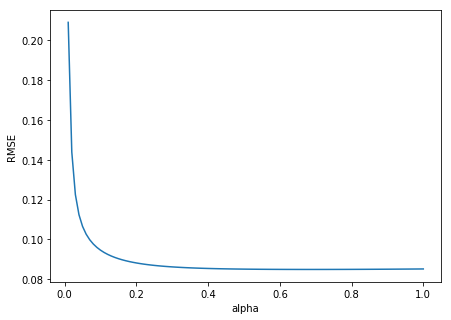

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(alpha, rmse)
plt.ylabel("RMSE")
plt.xlabel("alpha")

In [8]:
index_min = min(range(len(rmse)), key=rmse.__getitem__)
min_rmse_alpha = alpha[index_min]
print("alpha:", min_rmse_alpha)
print("RMSE:", rmse[index_min])

alpha: 0.69
RMSE: 0.0848955013575846


## Test set

Using the alpha value of 0.99, we will now test for the RMSE on our test set.

In [9]:
forecast = ewm_predict(test, min_rmse_alpha)
test_rmse = ewm_rmse(forecast)

In [10]:
print("Test set RMSE: {}".format(test_rmse))

Test set RMSE: 0.1684860496914927


In [11]:
from sklearn.externals import joblib
scaler = joblib.load("../scaler_two_weeks.save") 

In [12]:
forecast["Predicted"] = scaler.inverse_transform(forecast["Predicted"].values.reshape(-1,1))
forecast["next_day_value"] = scaler.inverse_transform(forecast["next_day_value"].values.reshape(-1,1))

In [13]:
dates = forecast.index[1:101]
date_ticks = forecast.index[1:101:10]
actual = forecast['next_day_value'].iloc[1:101]
predicted = forecast['Predicted'].iloc[1:101]

Text(0.5,1,'Exponential Weighted Moving Average - Two Week Prediction')

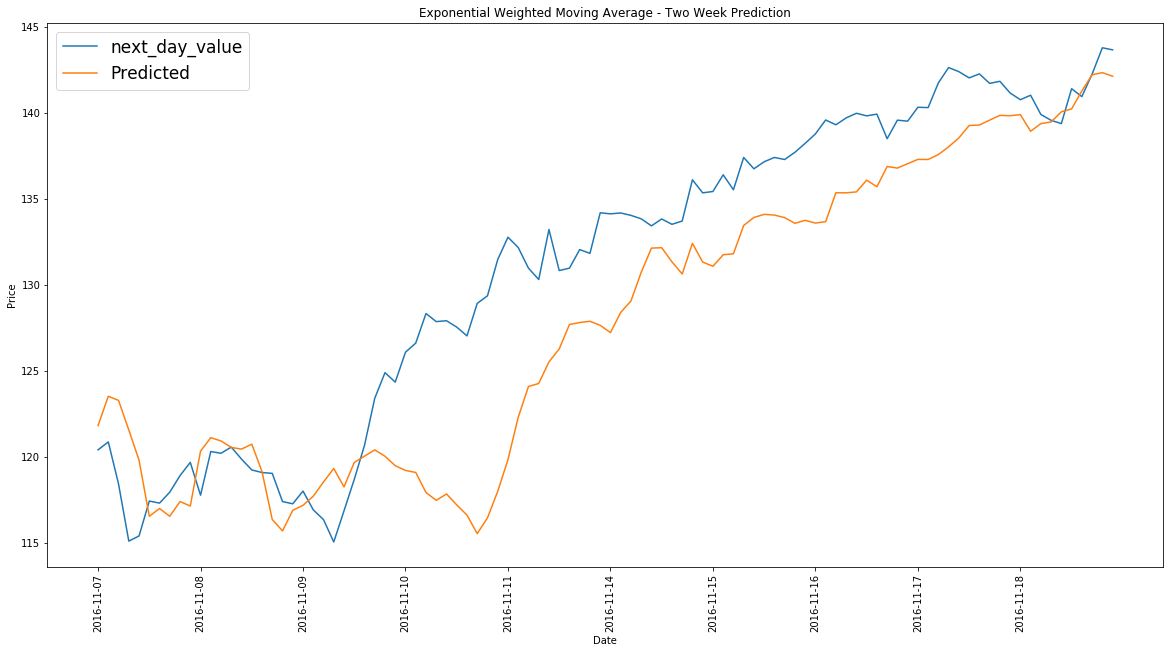

In [15]:
plt.figure(figsize=(20,10))
plt.plot(dates, actual)
plt.plot(dates, predicted)
plt.ylabel("Price")
plt.xticks(date_ticks, rotation=90)
plt.xlabel("Date")
plt.legend(prop={'size': 17})
plt.title("Exponential Weighted Moving Average - Two Week Prediction")